# EDA
The purpose of this stage is to understand the relationship of each variable with outcome varibale using graphs and generate useful information for the client.
This will also lead to techincal inputs for further processing
Only samples techniques of EDA are provided

In [1]:
import pandas as pd
import numpy as np
#import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
#import pydotplus
from matplotlib import rcParams
import seaborn as sns

from collections import Counter

In [2]:
names = ['c_EmpNumber','q_Age','c_Gender','c_EducationBackground','c_MaritalStatus','c_EmpDepartment','c_EmpJobRole','c_BusinessTravelFrequency',
         'q_DistanceFromHome','q_EmpEducationLevel','q_EmpEnvironmentSatisfaction','q_EmpHourlyRate','q_EmpJobInvolvement','q_EmpJobLevel'
        ,'q_EmpJobSatisfaction','q_NumCompaniesWorked','c_OverTime','q_EmpLastSalaryHikePercent','q_EmpRelationshipSatisfaction','q_TotalWorkExperienceInYears',
        'q_TrainingTimesLastYear','q_EmpWorkLifeBalance','q_ExperienceYearsAtThisCompany','q_ExperienceYearsInCurrentRole','q_YearsSinceLastPromotion',
        'q_YearsWithCurrManager','c_Attrition','y_PerformanceRating']

In [3]:
import os
os.chdir("C:/Users/SANKET/Downloads/Employee Performance Project/Employee Performance Project/Data")

In [4]:
df1 = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls",names=names)
df1.head(5)

,c_EmpNumber,q_Age,c_Gender,c_EducationBackground,c_MaritalStatus,c_EmpDepartment,c_EmpJobRole,c_BusinessTravelFrequency,q_DistanceFromHome,q_EmpEducationLevel,...,q_EmpRelationshipSatisfaction,q_TotalWorkExperienceInYears,q_TrainingTimesLastYear,q_EmpWorkLifeBalance,q_ExperienceYearsAtThisCompany,q_ExperienceYearsInCurrentRole,q_YearsSinceLastPromotion,q_YearsWithCurrManager,c_Attrition,y_PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
# Create All lists
AllColumns = ['c_EmpNumber', 'q_Age', 'c_Gender', 'c_EducationBackground',
       'c_MaritalStatus', 'c_EmpDepartment', 'c_EmpJobRole',
       'c_BusinessTravelFrequency', 'q_DistanceFromHome',
       'q_EmpEducationLevel', 'q_EmpEnvironmentSatisfaction',
       'q_EmpHourlyRate', 'q_EmpJobInvolvement', 'q_EmpJobLevel',
       'q_EmpJobSatisfaction', 'q_NumCompaniesWorked', 'c_OverTime',
       'q_EmpLastSalaryHikePercent', 'q_EmpRelationshipSatisfaction',
       'q_TotalWorkExperienceInYears', 'q_TrainingTimesLastYear',
       'q_EmpWorkLifeBalance', 'q_ExperienceYearsAtThisCompany',
       'q_ExperienceYearsInCurrentRole', 'q_YearsSinceLastPromotion',
       'q_YearsWithCurrManager', 'c_Attrition', 'y_PerformanceRating']
ConVarList= ['q_Age','q_DistanceFromHome','q_EmpEducationLevel', 'q_EmpEnvironmentSatisfaction','q_EmpHourlyRate', 'q_EmpJobInvolvement', 'q_EmpJobLevel',
       'q_EmpJobSatisfaction', 'q_NumCompaniesWorked','q_EmpLastSalaryHikePercent', 'q_EmpRelationshipSatisfaction',
       'q_TotalWorkExperienceInYears', 'q_TrainingTimesLastYear','q_EmpWorkLifeBalance', 'q_ExperienceYearsAtThisCompany',
       'q_ExperienceYearsInCurrentRole', 'q_YearsSinceLastPromotion','q_YearsWithCurrManager']
CatVarList=['c_EmpNumber', 'c_Gender', 'c_EducationBackground','c_MaritalStatus', 'c_EmpDepartment', 'c_EmpJobRole',
       'c_BusinessTravelFrequency','c_OverTime','c_Attrition']
OutcomeVar=['y_PerformanceRating']

# Checking normality of varibales - to understand the requirment of tranforming the varibales

In [6]:
# Check distribution of continous variables -Age and hours seem normal others are not
ConVarStats = df1[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
print(ConVarStats)

              q_Age  q_DistanceFromHome  q_EmpEducationLevel  \
skew       0.384145            0.962956            -0.250974   
kurtosis  -0.431000           -0.242017            -0.635594   
std        9.087289            8.176636             1.044120   
mean      36.918333            9.165833             2.892500   
min       18.000000            1.000000             1.000000   
median    36.000000            7.000000             3.000000   
max       60.000000           29.000000             5.000000   

          q_EmpEnvironmentSatisfaction  q_EmpHourlyRate  q_EmpJobInvolvement  \
skew                         -0.307665        -0.035165            -0.557846   
kurtosis                     -1.205577        -1.186891             0.368670   
std                           1.090599        20.211302             0.707164   
mean                          2.715833        65.981667             2.731667   
min                           1.000000        30.000000             1.000000   
median 

In [7]:
# The P value > 0.05 for the varible to be normal (In this test null hypothesis is reverse of usual. 
#None of the variables are normal. We can look at 
#log transforming those varibales before being fed into the algorithms
# None are normal

for i in ConVarList:
    print(i,stats.shapiro(df1[[i]]))

q_Age ShapiroResult(statistic=0.9790340065956116, pvalue=3.55104964530617e-12)
q_DistanceFromHome ShapiroResult(statistic=0.8570477366447449, pvalue=1.2257539048354803e-31)
q_EmpEducationLevel ShapiroResult(statistic=0.8985532522201538, pvalue=1.9452516439613064e-27)
q_EmpEnvironmentSatisfaction ShapiroResult(statistic=0.850751519203186, pvalue=3.4530657895447303e-32)
q_EmpHourlyRate ShapiroResult(statistic=0.9559425711631775, pvalue=1.5450358654722188e-18)
q_EmpJobInvolvement ShapiroResult(statistic=0.8011738061904907, pvalue=5.6217784152011436e-36)
q_EmpJobLevel ShapiroResult(statistic=0.8220618367195129, pvalue=1.7462512706779817e-34)
q_EmpJobSatisfaction ShapiroResult(statistic=0.846439778804779, pvalue=1.4856120949618726e-32)
q_NumCompaniesWorked ShapiroResult(statistic=0.8463385105133057, pvalue=1.4568277647932872e-32)
q_EmpLastSalaryHikePercent ShapiroResult(statistic=0.9041872620582581, pvalue=9.080582502230933e-27)
q_EmpRelationshipSatisfaction ShapiroResult(statistic=0.853510

# Box plot of all the varibles - to analyse the possibility of scaling

In [8]:
df1[ConVarList].describe()

,q_Age,q_DistanceFromHome,q_EmpEducationLevel,q_EmpEnvironmentSatisfaction,q_EmpHourlyRate,q_EmpJobInvolvement,q_EmpJobLevel,q_EmpJobSatisfaction,q_NumCompaniesWorked,q_EmpLastSalaryHikePercent,q_EmpRelationshipSatisfaction,q_TotalWorkExperienceInYears,q_TrainingTimesLastYear,q_EmpWorkLifeBalance,q_ExperienceYearsAtThisCompany,q_ExperienceYearsInCurrentRole,q_YearsSinceLastPromotion,q_YearsWithCurrManager
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


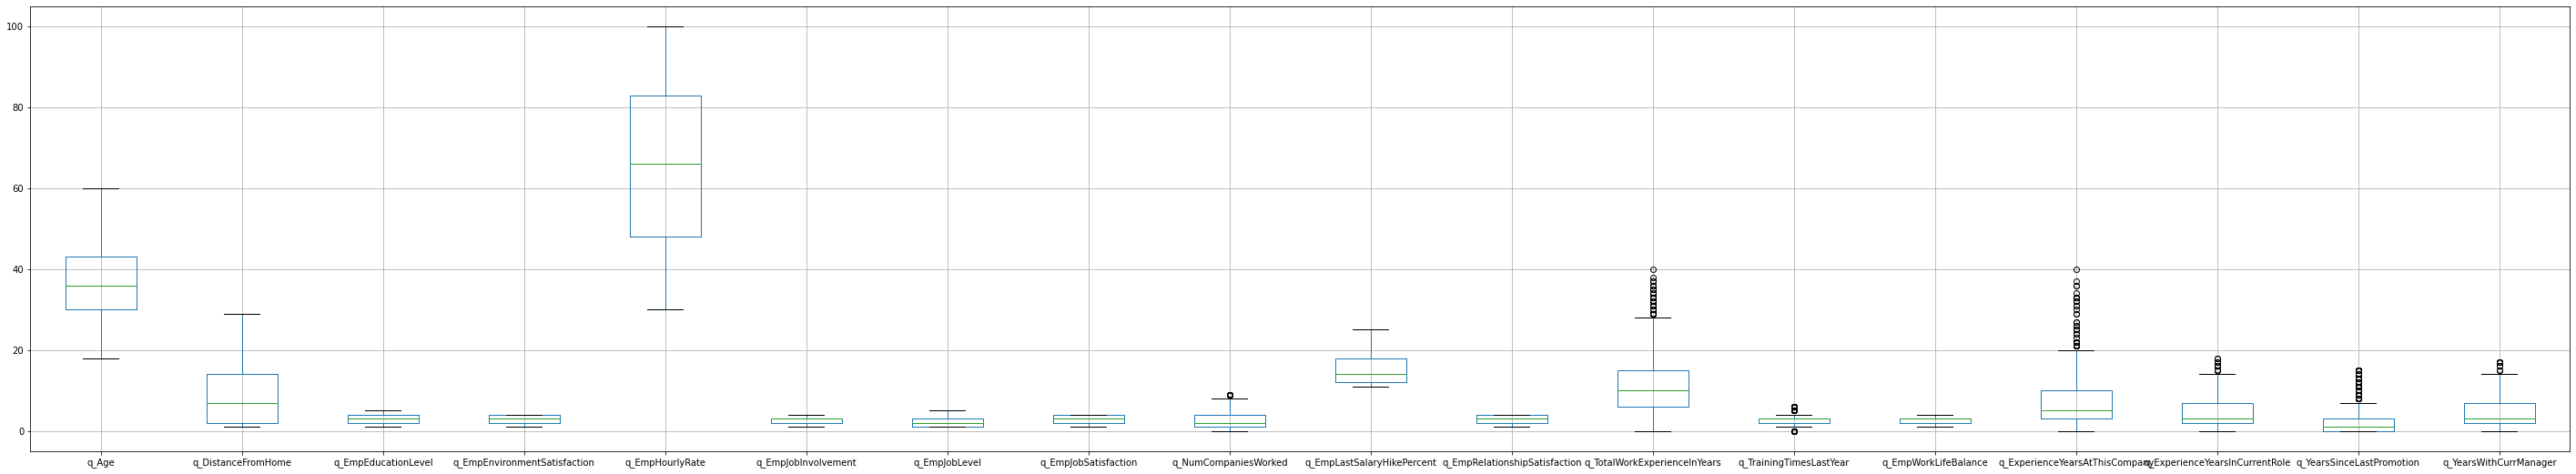

In [13]:
# the magnitude of variations between varibales is  huge. Variables have to be scaled.
rcParams['figure.figsize'] =50,9
df1[ConVarList].boxplot()

# Basic Pie chart of outcome variable

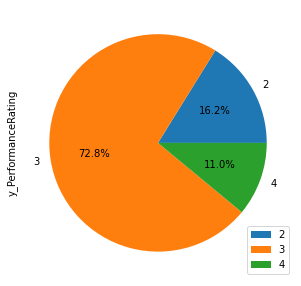

In [14]:
rcParams['figure.figsize'] =10,5
df1.y_PerformanceRating.value_counts(sort=False).plot.pie(labels=["2",'3','4'],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

In [15]:
df1.c_EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: c_EmpJobRole, dtype: int64

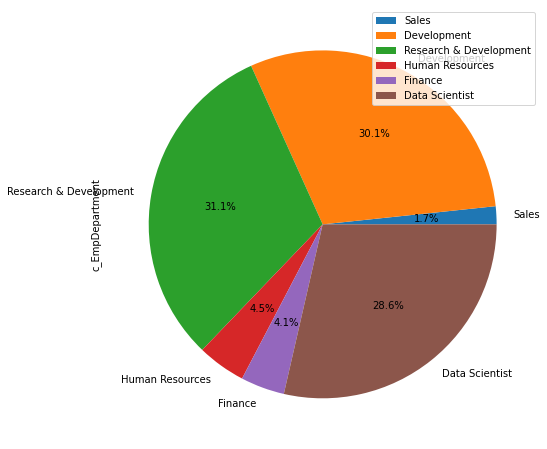

In [51]:
rcParams['figure.figsize'] =10,8
df1.c_EmpDepartment.value_counts(sort=False).plot.pie(labels=["Sales","Development","Research & Development","Human Resources", "Finance", "Data Scientist"],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

## Look actual nos

In [26]:
Counter(df1.y_PerformanceRating)

Counter({3: 874, 4: 132, 2: 194})

# Assessing Age
Use this techinique to analyse each continuous predictor with outcome variable

In [27]:
df1['q_Age'].describe()

count    1200.000000
mean       36.918333
std         9.087289
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: q_Age, dtype: float64

In [28]:
# Converting age into into Bins( 50 Days each). Check the frequency of each bin
custom_bucket_array = np.linspace(15, 90, 16)
df1['q_age_bin'] = pd.cut(df1['q_Age'], custom_bucket_array)

y_PerformanceRating   2    3   4
q_age_bin                       
(15.0, 20.0]          0   17   5
(20.0, 25.0]         16   55   8
(25.0, 30.0]         28  156  24
(30.0, 35.0]         47  213  24
(35.0, 40.0]         36  158  32
(40.0, 45.0]         25  116  19
(45.0, 50.0]         19   82   8
(50.0, 55.0]         15   56   6
(55.0, 60.0]          8   21   6


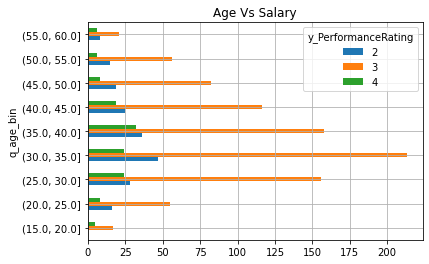

In [31]:
# Write your observation from analysis
Crosstab_AL = pd.crosstab(df1.q_age_bin, df1.y_PerformanceRating)
print(Crosstab_AL)
Crosstab_AL.plot(kind='barh', stacked=False, grid=True, title="Age Vs Salary")

In [32]:
# Delete the temporary columns created
DeletColList = ['q_age_bin']

# Delete the listed columns / features
df1.drop(DeletColList, inplace=True, axis=1)

#Index the columns to group catagorical, continous and outcome separately
df1=df1.sort_index(axis=1)


df1.head()

,c_Attrition,c_BusinessTravelFrequency,c_EducationBackground,c_EmpDepartment,c_EmpJobRole,c_EmpNumber,c_Gender,c_MaritalStatus,c_OverTime,q_Age,...,q_EmpRelationshipSatisfaction,q_EmpWorkLifeBalance,q_ExperienceYearsAtThisCompany,q_ExperienceYearsInCurrentRole,q_NumCompaniesWorked,q_TotalWorkExperienceInYears,q_TrainingTimesLastYear,q_YearsSinceLastPromotion,q_YearsWithCurrManager,y_PerformanceRating
0,No,Travel_Rarely,Marketing,Sales,Sales Executive,E1001000,Male,Single,No,32,...,4,2,10,7,1,10,2,0,8,3
1,No,Travel_Rarely,Marketing,Sales,Sales Executive,E1001006,Male,Single,No,47,...,4,3,7,7,2,20,2,1,7,3
2,No,Travel_Frequently,Life Sciences,Sales,Sales Executive,E1001007,Male,Married,Yes,40,...,3,3,18,13,5,20,2,1,12,4
3,No,Travel_Rarely,Human Resources,Human Resources,Manager,E1001009,Male,Divorced,No,41,...,2,2,21,6,3,23,2,12,6,3
4,No,Travel_Rarely,Marketing,Sales,Sales Executive,E1001010,Male,Single,No,60,...,4,3,2,2,8,10,1,2,2,3


# Analyse Employee Job Role with Employee performance Rate

y_PerformanceRating             2        3       4
c_EmpJobRole                                      
Business Analyst           0.0000   1.0833  0.2500
Data Scientist             0.0833   1.4167  0.1667
Delivery Manager           0.0000   1.0000  0.0000
Developer                  0.5000  16.5833  2.5833
Finance Manager            1.2500   2.5000  0.3333
Healthcare Representative  0.6667   1.8333  0.2500
Human Resources            0.7500   2.5833  0.4167
Laboratory Technician      1.1667   3.7500  0.4167
Manager                    1.0000   2.4167  0.8333
Manager R&D                1.4167   5.5000  0.9167
Manufacturing Director     0.2500   2.3333  0.1667
Research Director          0.4167   0.9167  0.2500
Research Scientist         1.4167   3.8333  1.1667
Sales Executive            5.3333  15.0833  2.0833
Sales Representative       1.0000   4.5000  0.2500
Senior Developer           0.5000   3.3333  0.5000
Senior Manager R&D         0.3333   0.8333  0.0833
Technical Architect        0.00

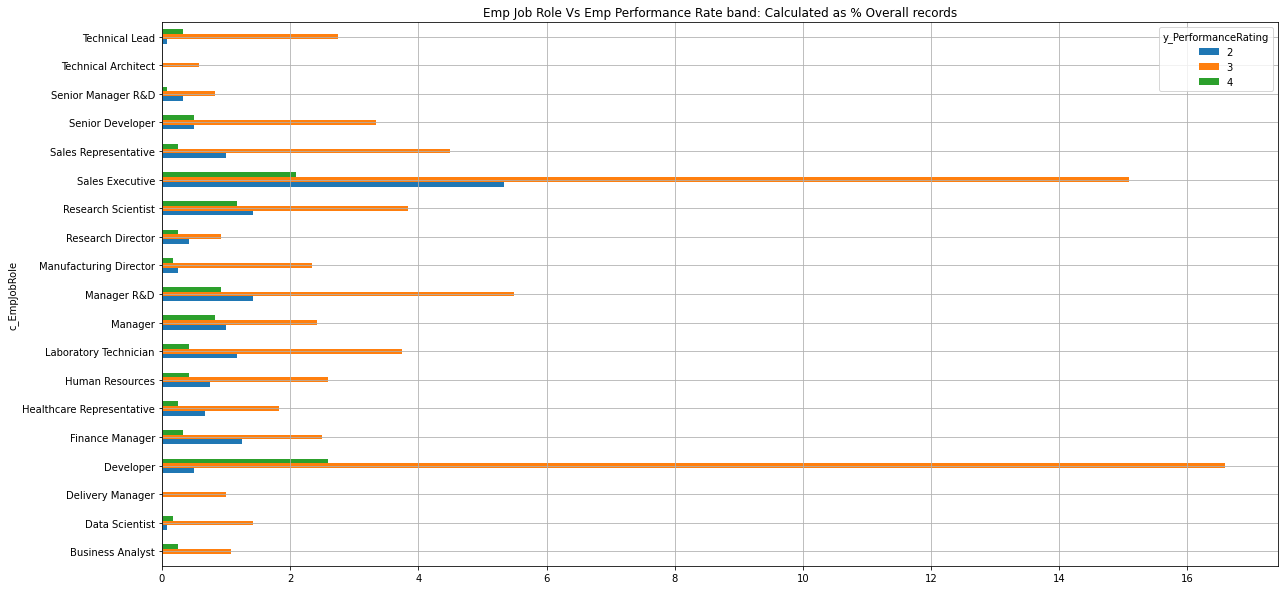

In [33]:
 # Write your observation. Add another variable to get a groupby affect of frequencies e.g. [df1.c_workclass,df1.c_education]

rcParams['figure.figsize'] =20,10
Crosstab_Cat = pd.crosstab([df1.c_EmpJobRole], df1.y_PerformanceRating,normalize = 'all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Emp Job Role Vs Emp Performance Rate band: Calculated as % Overall records")

In [34]:
# Masked after saving
df1.to_csv("3_Emp_performance_EDA.csv",index=False)

y_PerformanceRating         2        3       4
c_EducationBackground                         
Human Resources        0.2500   1.3333  0.1667
Life Sciences          6.5000  29.7500  4.7500
Marketing              2.4167   7.8333  1.1667
Medical                5.2500  23.4167  3.3333
Other                  0.2500   4.6667  0.5833
Technical Degree       1.5000   5.8333  1.0000


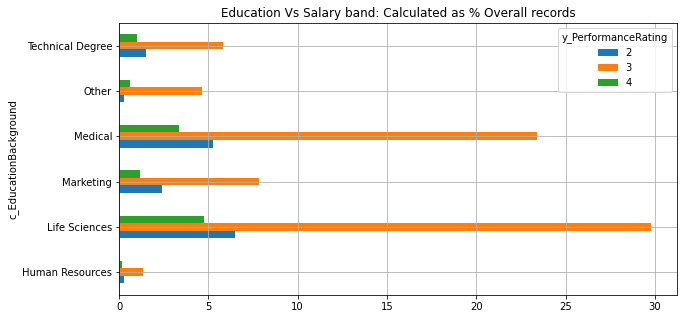

In [38]:
# Add another variable to get a groupby affect of frequencies e.g. [df1.c_empjobrole,df1.c_empeducationbackround]

rcParams['figure.figsize'] =10,5
Crosstab_Cat = pd.crosstab([df1.c_EducationBackground], df1.y_PerformanceRating,normalize = 'all').round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Education Vs Salary band: Calculated as % Overall records")